In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [8]:
# Read local .csv dataset
source = pd.read_csv('EU_Database.csv')

In [ ]:
source

In [10]:
# Create 2 dictionaries, key is year, value is total funding each year
# and total expense each year, respectively
di_fund = {}
di_spend = {}
for i in range(len(source)):
  if source.iloc[i]['Year'] not in di_fund:
    di_fund[source.iloc[i]['Year']] = source.iloc[i]['EU_Payment_annual']
  else:
    di_fund[source.iloc[i]['Year']] += source.iloc[i]['EU_Payment_annual']
  if source.iloc[i]['Year'] not in di_spend:
    di_spend[source.iloc[i]['Year']] = source.iloc[i]['Modelled_annual_expenditure']
  else:
    di_spend[source.iloc[i]['Year']] += source.iloc[i]['Modelled_annual_expenditure']

In [ ]:
di_fund

In [ ]:
di_spend

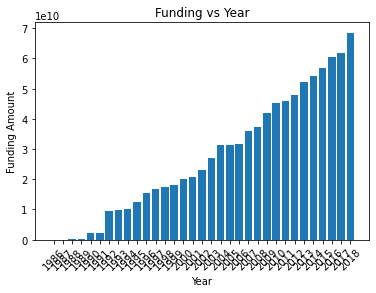

In [31]:
# Plot fund vs. year
di_fund_names = sorted(list(di_fund.keys()))
di_fund_values = sorted(list(di_fund.values()))

plt.bar(range(len(di_fund)), di_fund_values, tick_label=di_fund_names)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Funding Amount")
plt.title('Funding vs Year')
plt.show()

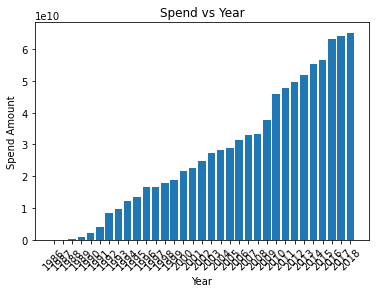

In [32]:
# Plot spend vs. year
di_spend_names = sorted(list(di_spend.keys()))
di_spend_values = sorted(list(di_spend.values()))

plt.bar(range(len(di_spend)), di_spend_values, tick_label=di_spend_names)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Spend Amount")
plt.title('Spend vs Year')
plt.show()